In [2]:
import math
import numpy as np
from numpy import genfromtxt
import operator
import random

In [3]:
# Import X and y from csv file
def read_logistic_data(filename):
    my_data = genfromtxt(filename, delimiter=';')
    X = []
    y= []
    for i in range(len(my_data)):
        new_data = my_data[i]
        y.append([new_data[-1]])
        X.append(np.delete(new_data, -1))
    return X, y

X_train, y_train = read_logistic_data('digits123-1.csv')
X_test, y_test = read_logistic_data('digits123-2.csv')

### Question 1: k-means clustering

In [4]:
def random_means(k, X):
    initialWeight = []
    for i in range(k):
        rand_x = int(random.uniform(0, len(X)-1))
        initialWeight.append(X[rand_x])
                
    return initialWeight

In [5]:
def KMeans(X, k, iterations, means):    
    for i in range(iterations):
        # Initialize lists to store assigned values in clusters
        clusters = list()
        for i in range(len(means)):
            clusters.append([])

        # Assign all training examples to a cluster
        for i in range(len(X)):
            distance = 9999
            for j in range(len(means)):
                euclidean = math.sqrt(sum((X[i]-means[j])**2))
                # Find the cluster with smallest euclidean distance
                if euclidean < distance:
                    result = j
                    distance = euclidean
            clusters[result].append(i)
        
        # Update cluster means
        for i in range(len(clusters)):
            mean_sum = 0
            for x in clusters[i]:
                mean_sum += X[x]
            mean_sum = mean_sum / len(clusters[i])         
            means[i] = mean_sum
 
    return means, clusters

In [6]:
# Example run: random means initialization (i.e. pick random training examples as mean)
rand_means = random_means(3, X_train)
means, clusters = KMeans(X_train, 3, 15, rand_means)

np.set_printoptions(precision=2, suppress=True)

for i in range(len(means)):
    print means[i]
    print 'Number of training examples assigned to mean: ', len(clusters[i])
    print '-------------------------------------------------------------------------'

[  0.     1.36  11.82  14.56   7.16   0.96   0.     0.     0.02   5.56
  13.74  12.26  10.99   3.23   0.03   0.     0.     3.79   7.6    6.24
  11.51   3.98   0.03   0.     0.     0.35   1.83   6.28  12.36   3.17   0.
   0.     0.     0.03   0.96   8.71  11.27   1.73   0.     0.     0.     0.16
   3.78  11.3    8.67   2.52   0.88   0.02   0.     1.37  11.45  14.06
  12.71  11.54   8.49   1.01   0.     1.4   12.01  14.45  13.14  12.12
   9.23   3.43]
Number of training examples assigned to mean:  94
-------------------------------------------------------------------------
[  0.     0.06   2.99  12.78  12.3    4.05   0.57   0.01   0.     0.4
   5.64  14.75  15.23   6.94   0.77   0.01   0.03   1.12   6.56  14.71
  15.23   5.91   0.23   0.     0.01   1.57   7.49  15.01  14.49   3.84
   0.05   0.     0.     0.7    7.14  14.83  13.61   2.69   0.01   0.     0.
   0.43   7.25  14.78  13.57   2.32   0.     0.     0.     0.18   5.97
  14.55  13.34   3.13   0.09   0.     0.     0.04   3.25  12.04

In [7]:
# Example run: another random means initialization
rand_means = random_means(3, X_train)
means, clusters = KMeans(X_train, 3, 15, rand_means)

for i in range(len(means)):
    print means[i]
    print 'Number of training examples assigned to mean: ', len(clusters[i])
    print '-------------------------------------------------------------------------'

[  0.     1.36  11.82  14.56   7.16   0.96   0.     0.     0.02   5.56
  13.74  12.26  10.99   3.23   0.03   0.     0.     3.79   7.6    6.24
  11.51   3.98   0.03   0.     0.     0.35   1.83   6.28  12.36   3.17   0.
   0.     0.     0.03   0.96   8.71  11.27   1.73   0.     0.     0.     0.16
   3.78  11.3    8.67   2.52   0.88   0.02   0.     1.37  11.45  14.06
  12.71  11.54   8.49   1.01   0.     1.4   12.01  14.45  13.14  12.12
   9.23   3.43]
Number of training examples assigned to mean:  94
-------------------------------------------------------------------------
[  0.     0.09   3.29  12.9   12.44   4.34   0.55   0.01   0.     0.4
   5.78  14.51  15.04   7.26   0.79   0.01   0.03   1.07   6.31  14.29
  15.12   6.19   0.25   0.     0.01   1.51   7.25  14.88  14.53   3.81
   0.05   0.     0.     0.68   6.91  14.79  13.64   2.65   0.01   0.     0.
   0.41   7.04  14.55  13.66   2.45   0.     0.     0.     0.21   5.9
  14.25  13.41   3.17   0.09   0.     0.     0.05   3.58  12.19 

In [8]:
# Example run: handselected values for mean.
means, clusters = KMeans(X_train, 3, 15, [X_train[0], X_train[150], X_train[299]])

for i in range(len(means)):
    print means[i]
    print 'Number of training examples assigned to mean: ', len(clusters[i])
    print '-------------------------------------------------------------------------'

[  0.     0.09   3.29  12.9   12.44   4.34   0.55   0.01   0.     0.4
   5.78  14.51  15.04   7.26   0.79   0.01   0.03   1.07   6.31  14.29
  15.12   6.19   0.25   0.     0.01   1.51   7.25  14.88  14.53   3.81
   0.05   0.     0.     0.68   6.91  14.79  13.64   2.65   0.01   0.     0.
   0.41   7.04  14.55  13.66   2.45   0.     0.     0.     0.21   5.9
  14.25  13.41   3.17   0.09   0.     0.     0.05   3.58  12.19  12.9
   3.67   0.19   0.  ]
Number of training examples assigned to mean:  80
-------------------------------------------------------------------------
[  0.     1.36  11.82  14.56   7.16   0.96   0.     0.     0.02   5.56
  13.74  12.26  10.99   3.23   0.03   0.     0.     3.79   7.6    6.24
  11.51   3.98   0.03   0.     0.     0.35   1.83   6.28  12.36   3.17   0.
   0.     0.     0.03   0.96   8.71  11.27   1.73   0.     0.     0.     0.16
   3.78  11.3    8.67   2.52   0.88   0.02   0.     1.37  11.45  14.06
  12.71  11.54   8.49   1.01   0.     1.4   12.01  14.45  

### Question 2: optimized k

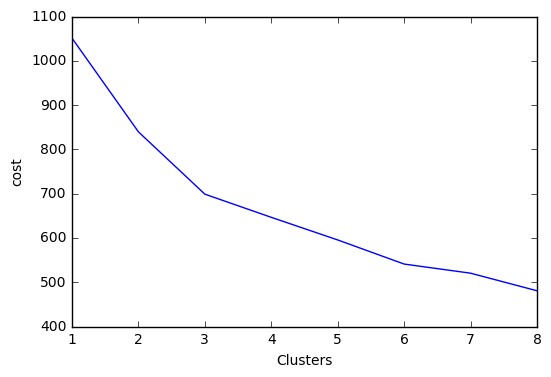

In [50]:
import matplotlib.pyplot as plt
def J(means, clusters, X):
    cost_sum = 0
    cluster_means = []
    for i in range(len(clusters)):
        for x in clusters[i]:
            cost_sum += sum((X[x]-means[i])**2)
    return cost_sum / len(X)

cost = []
k_list = []
for k in range(1,9):
    rand_means = random_means(k, X_train)
    means, clusters = KMeans(X_train, k, 15, rand_means)
    cost.append(J(means, clusters, X_train))
    k_list.append(k)
    
plt.plot(k_list, cost)
plt.ylabel("cost")
plt.xlabel("Clusters")
plt.show()
    
    

    
# sum = 0
# for every training example: 
# sum +=  || training example - cluster centroid of assigned cluster || ^ 2
#
# sum = sum / n of training examples



In [39]:
# TODO

# cost function 
# determine best k using cost function
# plot elbow method

# run random mean initialization x times, pick one that results in lowest cost